[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Albly/Sparce_image_reconstruction/blob/master/notebooks/tests.ipynb)

In [1]:
from IPython import get_ipython
import os 
import sys
from pathlib import Path

%load_ext autoreload
%autoreload 2

# check if we use colab or local machine
if 'google.colab' in str(get_ipython()):
    IS_COLAB = True
    print('Running on colab')
else:
    IS_COLAB = False
    print('Running on local machine')

if IS_COLAB:
    git_root = !git rev-parse --show-toplevel
    already_in_repo = os.path.exists(git_root[0])

    if not already_in_repo:
        !git clone https://github.com/Albly/Sparce_image_reconstruction $repo_dir

    sys.path.append('Sparce_image_reconstruction')

else:
    os.chdir(Path().absolute().parent)

Running on local machine


Batch of images has shape:  torch.Size([1, 512, 512])
Batch of labels:  tensor([6])
Dataset length = 83


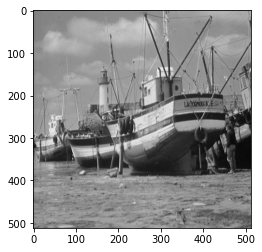

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

from dataloader import CustomDataset

# path to dataset images
path = 'datasets/USC_SIPI/'
# create dataset
usc_sipi_set = CustomDataset(path)
# create dataloader
usc_sipi_loader = DataLoader(usc_sipi_set, batch_size=1, shuffle=True)
# test dataloader

for imgs, labels in usc_sipi_loader:
    print("Batch of images has shape: ",imgs.shape)
    print("Batch of labels: ", labels)
    plt.imshow(imgs[0,:,:],cmap='gray')
    break
print('Dataset length =',len(usc_sipi_set))
img_original = imgs[0]

# Denoising using sparse signal representation in DFT domain

### (descrete fourier transform)

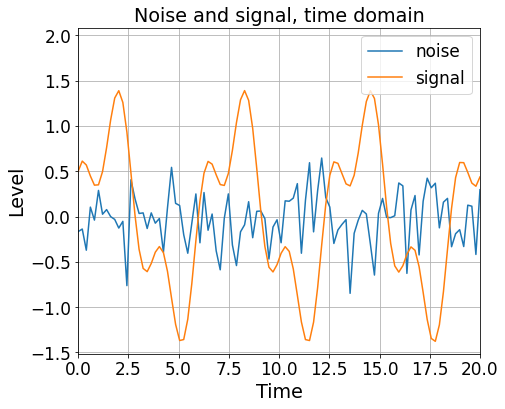

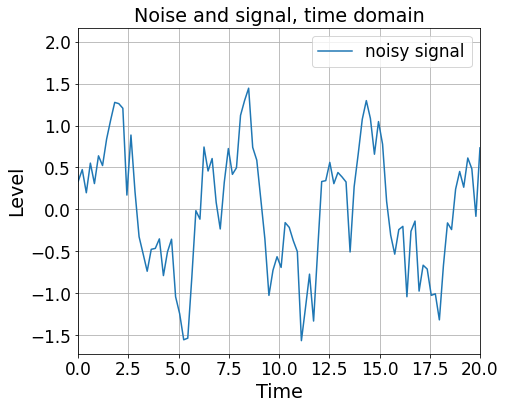

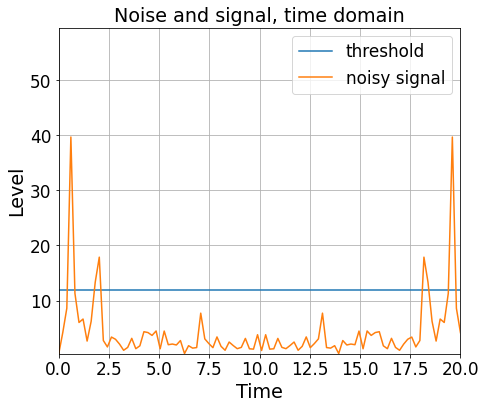

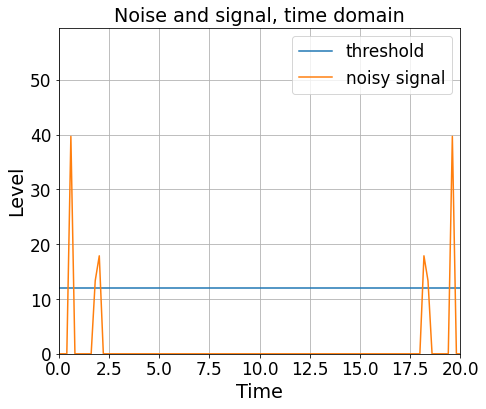

/home/stas/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


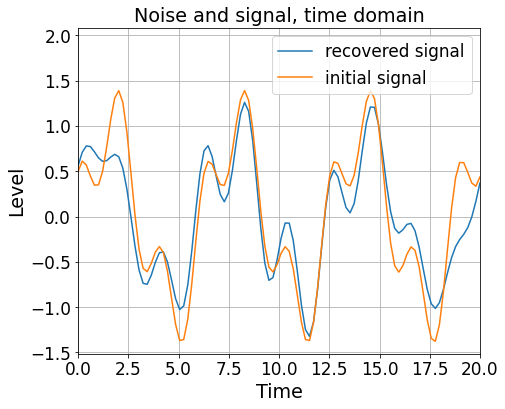

In [3]:
import matplotlib.pyplot as plt
import numpy as np

k = 1.2
a = 6*k
b = 5*k
fs1 = 16*k
fs2 = 14*k

def create_plot(a,b,fs1,fs2,k,title,PLOT):
    plt.figure(figsize=(a,b))
    plt.title('Noise and signal, time domain',fontsize=fs1)
    plt.xlabel('Time',fontsize=fs1)
    plt.ylabel('Level',fontsize=fs1)
    plt.xticks(fontsize=fs2)
    plt.yticks(fontsize=fs2)
    for item in PLOT:
        x = item[0]
        y = item[1]
        plt.plot(x,y,label=item[2])
    plt.xlim(min(t),max(t))
    plt.ylim(1.1*min(y),1.5*max(y))
    plt.legend(fontsize=fs2,loc='upper right')
    plt.grid()
    plt.show()
    return None

n = 0.3*np.random.randn(100)
t = np.linspace(0,20,100)
s = np.sin(t) + 0.5*np.cos(3*t)
sn = s + n



sf = np.fft.fft(sn)
sf_abs = np.abs(sf)
th = 12
sf1 = np.copy(sf)
sf1[sf_abs <= th] = 0
sf1_abs = np.abs(sf1)
s_rec = np.fft.ifft(sf1)

PLOT= [[t,n,'noise'],[t,s,'signal']]
title = 'Noise and signal, time domain'
create_plot(a,b,fs1,fs2,k,title,PLOT)

PLOT= [[t,sn,'noisy signal']]
title = 'Noisy signal, time domain'
create_plot(a,b,fs1,fs2,k,title,PLOT)

PLOT= [[t,th*np.ones_like(t),'threshold'],[t,sf_abs,'noisy signal']]
title = 'Noisy signal, freuqency domain'
create_plot(a,b,fs1,fs2,k,title,PLOT)

PLOT= [[t,th*np.ones_like(t),'threshold'],[t,sf1_abs,'noisy signal']]
title = 'Noisy signal, freuqency domain'
create_plot(a,b,fs1,fs2,k,title,PLOT)

PLOT= [[t,s_rec,'recovered signal'],[t,s,'initial signal']]
title = 'Noise and signal, time domain'
create_plot(a,b,fs1,fs2,k,title,PLOT)

# Denoising using sparse signal representation in DCT domain
### (descrete cosine transform)

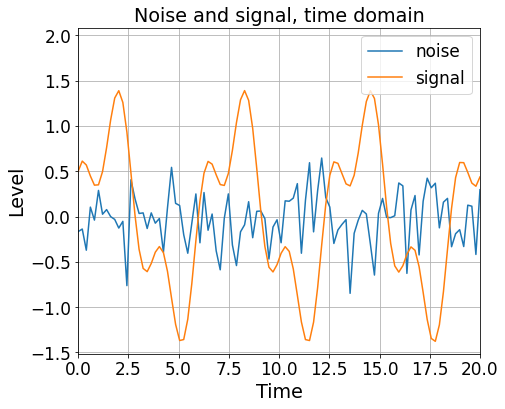

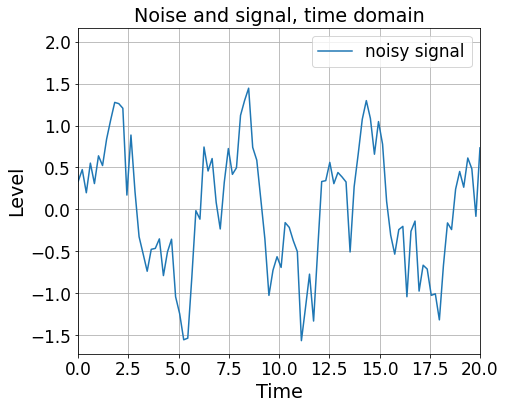

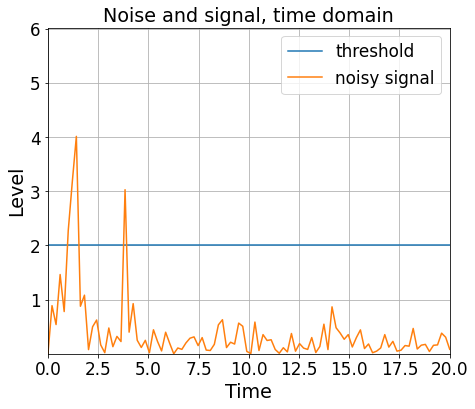

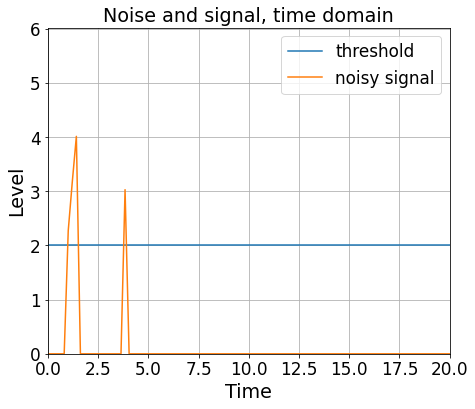

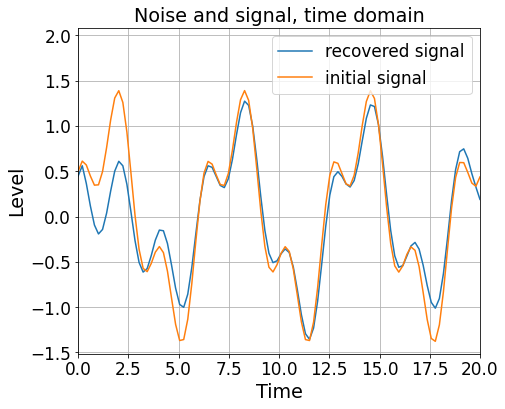

In [4]:
import scipy.fftpack # for DCT

# DCT
sf = scipy.fftpack.dct(sn, 1,norm='ortho')
sf_abs = np.abs(sf)
th = 2
sf1 = np.copy(sf)
sf1[sf_abs <= th] = 0
sf1_abs = np.abs(sf1)
# IDCT
s_rec = scipy.fftpack.dct(sf1, 1,norm='ortho')

PLOT= [[t,n,'noise'],[t,s,'signal']]
title = 'Noise and signal, time domain'
create_plot(a,b,fs1,fs2,k,title,PLOT)

PLOT= [[t,sn,'noisy signal']]
title = 'Noisy signal, time domain'
create_plot(a,b,fs1,fs2,k,title,PLOT)

PLOT= [[t,th*np.ones_like(t),'threshold'],[t,sf_abs,'noisy signal']]
title = 'Noisy signal, freuqency domain'
create_plot(a,b,fs1,fs2,k,title,PLOT)

PLOT= [[t,th*np.ones_like(t),'threshold'],[t,sf1_abs,'noisy signal']]
title = 'Noisy signal, freuqency domain'
create_plot(a,b,fs1,fs2,k,title,PLOT)

PLOT= [[t,s_rec,'recovered signal'],[t,s,'initial signal']]
title = 'Noise and signal, time domain'
create_plot(a,b,fs1,fs2,k,title,PLOT)

# Denoising using sparse signal representation in DWT domain
### (descrete wavelet transform)

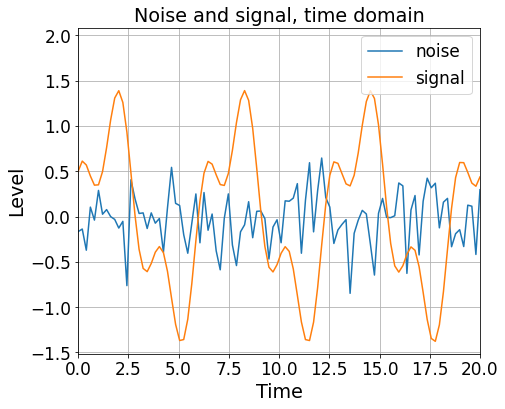

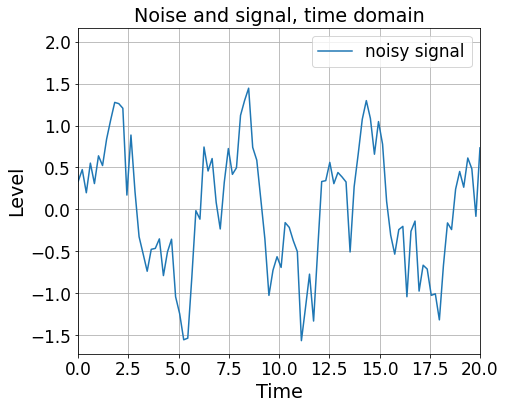

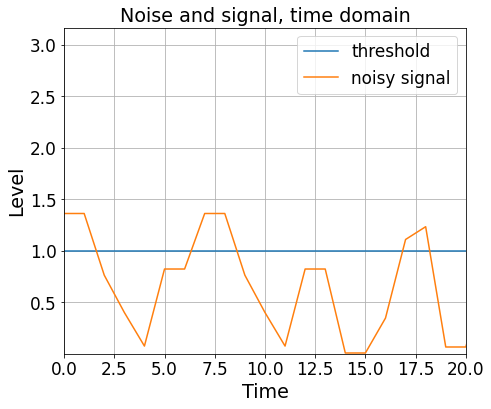

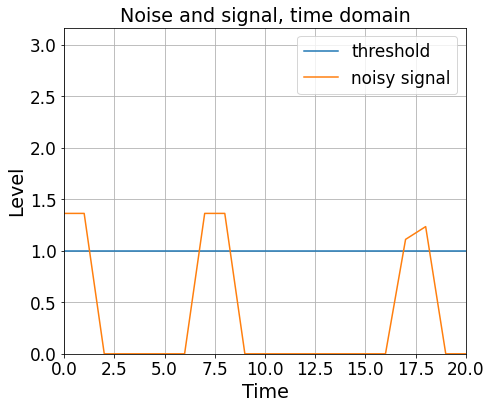

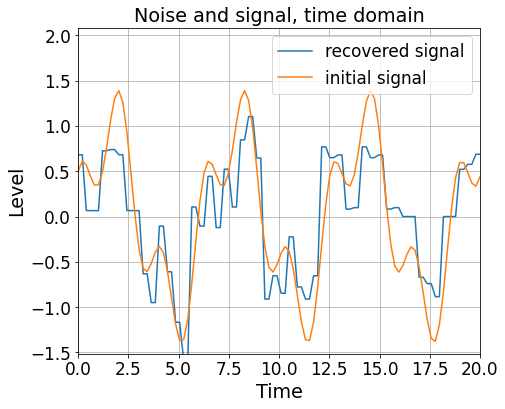

In [6]:
import matplotlib.pyplot as plt

from utils import wlet_forward,wlet_inverse

img = sn.reshape(10,10)
wlet = 'bior1.3'
levl = 1

# DWT
sw,cMat_shapes = wlet_forward(sn.reshape(10,10),wlet,levl)
sw_abs = np.abs(sw)
tw = np.arange(sw_abs.shape[0])

th = 1
k = 0
sw1 = np.copy(sw)
sw1[k:][sw_abs[k:] <= th] = 0
sw1_abs = np.abs(sw1)
# IDWT
s_rec = wlet_inverse(sw1,cMat_shapes,wlet,levl).reshape(-1,)

PLOT= [[t,n,'noise'],[t,s,'signal']]
title = 'Noise and signal, time domain'
create_plot(a,b,fs1,fs2,k,title,PLOT)

PLOT= [[t,sn,'noisy signal']]
title = 'Noisy signal, time domain'
create_plot(a,b,fs1,fs2,k,title,PLOT)

PLOT= [[tw,th*np.ones_like(tw),'threshold'],[tw,sw_abs,'noisy signal']]
title = 'Noisy signal, freuqency domain'
create_plot(a,b,fs1,fs2,k,title,PLOT)

PLOT= [[tw,th*np.ones_like(tw),'threshold'],[tw,sw1_abs,'noisy signal']]
title = 'Noisy signal, freuqency domain'
create_plot(a,b,fs1,fs2,k,title,PLOT)

PLOT= [[t,s_rec,'recovered signal'],[t,s,'initial signal']]
title = 'Noise and signal, time domain'
create_plot(a,b,fs1,fs2,k,title,PLOT)

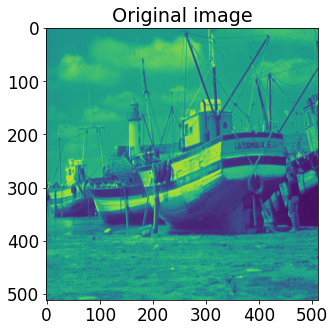

In [7]:
plt.figure(figsize=(5,5))
plt.title('Original image',fontsize=fs1)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.imshow(imgs[0,:,:])
plt.show()

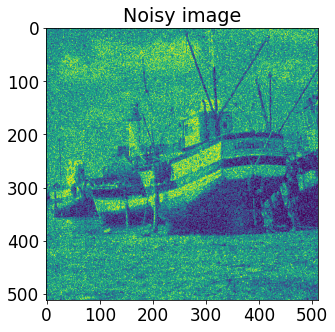

In [8]:
n = 60*torch.randn_like(img_original)
img_n = img_original + n
img_n[img_n > 255] = 255
img_n[img_n < 0] = 0


img_f = torch.fft.fft2(img_n)
img_f_abs = torch.abs(img_f)


plt.figure(figsize=(5,5))
plt.title('Noisy image',fontsize=fs1)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.imshow(img_n)
plt.show()

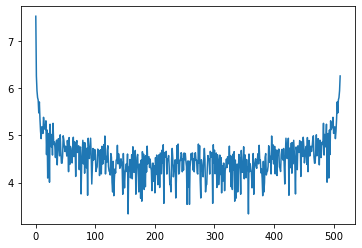

In [9]:
plt.plot(torch.log10(img_f_abs[0,:]))

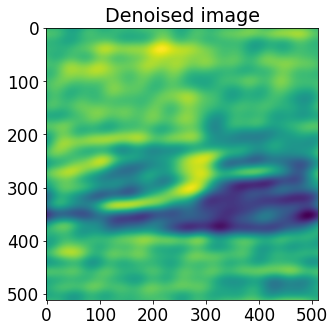

In [10]:
img_f[torch.log10(img_f_abs) < 5.5] = 0
img_rec = torch.fft.ifft2(img_f).real
img_rec[img_rec > 255] = 255
img_rec[img_rec < 0] = 0


plt.figure(figsize=(5,5))
plt.title('Denoised image',fontsize=fs1)
plt.xticks(fontsize=fs2)
plt.yticks(fontsize=fs2)
plt.imshow(img_rec)
plt.show()

In [11]:
from metrics import PSNR,NMSE,SSIM
print('PSNR =',PSNR(img_original,img_n))
print('SSIM =',SSIM(img_original,img_n))
# print('MSE  =',mse(img_original,img_n).item())
print('NMSE =',NMSE(img_original,img_n))

print('PSNR =',PSNR(img_original,img_rec))
print('SSIM =',SSIM(img_original,img_rec))
# print('MSE  =',mse(img_original,img_rec).item())
print('NMSE =',NMSE(img_original,img_rec))

PSNR = 13.236804008483887
SSIM = 0.12919885153773727
NMSE = 0.16239763796329498
PSNR = 18.987234115600586
SSIM = 0.4524974811321218
NMSE = 0.04320526868104935
